In [1]:
import os, re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from konlpy.tag import Okt
from collections import Counter

okt=Okt()

from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
PATH='/root/workspace/data/'

In [4]:
pre_model=Word2Vec.load(PATH+'ko.bin')

In [3]:
chicken=pd.read_csv(PATH+'chicken.csv', encoding='utf-8')
pizza=pd.read_csv(PATH+'pizza.csv', encoding='utf-8')
china=pd.read_csv(PATH+'china.csv', encoding='utf-8')
korea=pd.read_csv(PATH+'korea.csv', encoding='utf-8')
japan=pd.read_csv(PATH+'japan.csv', encoding='utf-8')
pig=pd.read_csv(PATH+'pig.csv', encoding='utf-8')
tteok=pd.read_csv(PATH+'tteok.csv', encoding='utf-8')
cafe=pd.read_csv(PATH+'cafe.csv', encoding='utf-8')


In [4]:
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# def make_token(review):
#     temp=re.sub("[^가-힣0-9]"," ",review)
#     temp=okt.morphs(temp, stem=True)
#     temp=[word for word in temp if not word in stopwords]
    
#     return temp

# chicken['token']=chicken.review_customer.map(lambda x: make_token(x))
# pizza['token']=pizza.review_customer.map(lambda x: make_token(x))
# china['token']=china.review_customer.map(lambda x: make_token(x))
# korea['token']=korea.review_customer.map(lambda x: make_token(x))
# japan['token']=japan.review_customer.map(lambda x: make_token(x))
# pig['token']=pig.review_customer.map(lambda x: make_token(x))
# tteok['token']=tteok.review_customer.map(lambda x: make_token(x))
# cafe['token']=cafe.review_customer.map(lambda x: make_token(x))


In [9]:
# all_token1=pd.concat([chicken,pizza,china])
# all_token2.to_csv(PATH+'all_token2.csv',index=False)
# del korea,japan,pig,tteok,cafe
# all_token2=pd.concat([korea,japan,pig,tteok,cafe])

In [8]:
all_token1=pd.read_csv(PATH+'all_token1.csv')
all_token2=pd.read_csv(PATH+'all_token2.csv')

In [6]:
import ast
from tqdm import tqdm

In [7]:
all_token1.token=all_token1.token.map(lambda x: ast.literal_eval(x))

In [8]:
all_token2.token=all_token2.token.map(lambda x: ast.literal_eval(x))

In [34]:
all_token1.token[0]

"['또', '순', '살', '시키다', '게', '뼈', '로', '시키다', '그래도', '맛있다']"

In [9]:
a=all_token1.token.values.flatten().tolist()

In [10]:
b=all_token2.token.values.flatten().tolist()

In [11]:
a_b=a+b

In [ ]:
a_flatten=sum(a,[])

In [ ]:
print(len(a_b), len(b))

In [ ]:
b_flatten=[]
for i in tqdm(range(35)):
    i=i*10000
    b_flatten+=sum(a_b[i:10000+i],[])

In [35]:
b_flatten+=sum(a_b[350000:len(a_b)],[])

In [36]:
len(b_flatten)

4107388

In [37]:
counter=Counter(b_flatten)

In [44]:
len(counter.keys())

37533

In [47]:
threshold = 5
total_cnt = len(counter.keys()) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합


for key, value in counter.items():

    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 4번 이하인 희귀 단어의 수: 26421
단어 집합(vocabulary)에서 희귀 단어의 비율: 70.39405323315482
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.9580054282673075


In [26]:
tokenized_data=all_token1.token.values.tolist()+all_token2.token.values.tolist()

In [48]:
model = Word2Vec(sentences = tokenized_data, size = 100, window = 2, min_count = 5, workers = 4, sg = 1)

In [477]:
model.save(simPATH+'word2vec_onlyshop.model')

In [49]:
model.wv.__getitem__('어니언')

array([-0.45582926, -0.4974442 , -0.00392115,  0.36136827, -0.00413889,
       -0.38916242, -0.76116246, -0.47198352, -0.14060664, -0.35757565,
        0.43927255, -0.49463847,  0.13601674,  0.54748505, -0.05547973,
       -0.17318682,  0.18390794,  0.47455207, -0.14651121, -0.05316232,
        0.22095923, -0.5374176 , -0.14898019,  0.01605149, -0.22776416,
       -0.14425994, -0.12018874,  0.38784623,  0.00446563, -0.15336698,
        0.23003332,  0.00966441, -0.2182787 , -0.08929568,  0.18126804,
        0.25238594,  0.37080023, -0.05004877, -0.34166646, -0.02958576,
       -0.23712286,  0.55851036,  0.10558522, -0.17000224,  0.04894657,
        0.08901779,  0.13006736,  0.24720027, -0.09828501,  0.12128738,
        0.18939151,  0.12026536,  0.23226993, -0.5158741 , -0.3510514 ,
        0.23753142,  0.10486021,  0.04814807, -0.26482004,  0.18042392,
        0.6028487 ,  0.5915303 , -0.03121515,  0.1283408 , -0.35301545,
        0.19601709, -0.05670721, -0.09689422, -0.42120934, -0.01

In [58]:
model.wv.most_similar('맛있다')

[('멋있다', 0.7858606576919556),
 ('맛잇엇어용', 0.7211551666259766),
 ('맛남', 0.6892239451408386),
 ('좋아욤', 0.6791785955429077),
 ('흡족하다', 0.6778246164321899),
 ('맛있엇어', 0.6776534914970398),
 ('맛깔나다', 0.6754742860794067),
 ('맛잇어욤', 0.6749119758605957),
 ('맛나욤', 0.6726900935173035),
 ('맜있어', 0.6658730506896973)]

In [28]:
len(tokenized_data)

355743

리뷰의 최대 길이 : 207
리뷰의 최대 길이 : 0
리뷰의 평균 길이 : 11.545941873768422


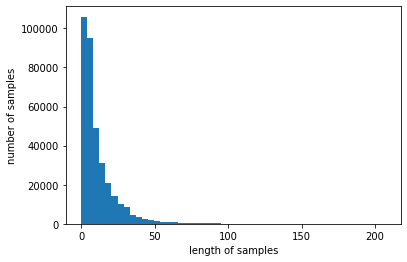

In [29]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 최대 길이 :',min(len(l) for l in tokenized_data))

print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [4]:
catagory=pd.read_csv(PATH+'catagory_num.csv', encoding='utf-8')
cata_list=[catagory[catagory.catagory==i].shop.values.tolist() for i in range(16)]

In [10]:
def cluster(i):
    catagory=pd.DataFrame
    for num in cata_list[i]:
        for cata in foodlist:
            now=cata[cata.shop==num]
            if catagory.empty:
                catagory=now
            else:
                catagory=catagory.append(now)
    
    catagory.reset_index(drop=True,inplace=True)
    
    return catagory

In [24]:
catagory0=cluster(0)
catagory0['sim']=None
catagory0['sim2']=None
catagory0.to_csv(simPATH+'cat0_sim.csv', index=False)


In [14]:
catagory12.shape

(2156, 11)

In [9]:
foodlist=[all_token1,all_token2]

In [ ]:
for i in range(0,16):
    globals()[f'catagory{i}']=cluster(i)

In [ ]:
catagory15=cluster(15)

In [432]:
import warnings
warnings.filterwarnings(action='ignore')

In [495]:
def make_fin_test(catagory):
    cat15_shopss=catagory.shop.unique().tolist()
    fin_test=pd.DataFrame
    for i in range(len(cat15_shopss)):
        test=catagory[catagory.shop==cat15_shopss[i]]
        test_tokenized_data=test.token.values.tolist()
        document_embedding_list=make_doc_embed_list(test_tokenized_data)
        cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
        sim=make_sim(cosine_similarities,test)
        test['sim']=sim
        if fin_test.empty:
            fin_test=test
        else:
            fin_test=fin_test.append(test)
    
    test_tokenized_data=catagory.token.values.tolist()
    document_embedding_list=make_doc_embed_list(test_tokenized_data)
    cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
    sim=make_sim(cosine_similarities,catagory)
    fin_test['sim2']=sim
    
    return fin_test

In [496]:
fin_test11=make_fin_test(catagory11)

In [500]:
fin_test7

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name,token,sim,sim2
0,양계장집아들-용답점,rl**님,22시간 전,4.0,5.0,5.0,양아들 치킨/1(사이드메뉴 추가선택(양념소스 추가)),맛있어요 배송도 빠르고!,NaN,NaN,"[맛있다, 배송, 빠르다]",0.500000,0.790000
1,양계장집아들-용답점,jj**님,어제,5.0,5.0,5.0,순살세트5（순살후라이드＋순살매운양념＋순살마늘간장）/1,여기는 그냥 최고입니다.,NaN,NaN,"[여기다, 그냥, 최고, 이다]",0.250000,0.437500
2,양계장집아들-용답점,hy**님,2020년 12월 9일,5.0,5.0,5.0,양아들 치킨/1(사이드메뉴 추가선택(양념소스 추가)),배달도 빠르고 맛은 뭐 말해뭐해 맛있죠..\n바삭바삭..ㅋㅋㅋ\n쥐포튀김도 바삭바삭...,NaN,양계장집아들-용답점_2,"[배달, 빠르다, 맛, 뭐, 말, 뭐해, 맛있다, 바삭바삭, 쥐포, 튀김, 바삭바삭...",0.708333,0.810000
3,양계장집아들-용답점,bl**님,2020년 12월 1일,5.0,4.0,5.0,"양아들 두마리 치킨/1(치킨 선택1(양아들치킨),치킨 선택2(양아들치킨))",제 실수로 양념하나를 못했네요 근데 후라이드도 맛있고 근처 살아서 배달 엄청 빨리왔...,NaN,양계장집아들-용답점_3,"[제, 실수, 로, 양념, 하나, 못, 근데, 후라이드, 맛있다, 근처, 살다, 배...",0.687500,0.775000
4,양계장집아들-용답점,jj**님,2020년 11월 16일,5.0,5.0,5.0,순살마늘 간장치킨/1,여기는 진심 그냥 믿고 먹습니다. 인정? 어 인정!,NaN,NaN,"[여기다, 진심, 그냥, 믿다, 먹다, 인정, 어, 인정]",0.250000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7592,마녀불떡볶이와닭발,손님,2015년 6월 8일,NaN,NaN,NaN,NaN,늘먹어도 맛있어요^^,NaN,NaN,"[늘, 먹다, 맛있다]",0.416667,0.840000
7593,마녀불떡볶이와닭발,손님,2015년 5월 30일,NaN,NaN,NaN,NaN,순살불닭 쪼금 탔어요.\n그리고 오뎅이랑 만두 하나만 주셔 아쉬었어요.\n^^그래도...,NaN,NaN,"[순, 살, 불닭, 쪼금, 타다, 그리고, 오뎅, 이랑, 만두, 하나, 만, 주다,...",0.447917,0.735000
7594,마녀불떡볶이와닭발,손님,2015년 5월 15일,NaN,NaN,NaN,NaN,맛있어요~ 떢볶이에 치떡이랑 쏘세지두 들어있어요~^^맛남~츄천~,NaN,NaN,"[맛있다, 떢볶이, 치떡, 이랑, 쏘다, 들다, 맛남, 츄천]",0.333333,0.675000
7595,마녀불떡볶이와닭발,손님,2015년 5월 14일,NaN,NaN,NaN,NaN,리뷰믿고먹었다가 완져너대박 짜증 다버림. 떡은 오래된듯 불어있고 대체 무슨맛인지 모...,NaN,NaN,"[리뷰, 믿다, 먹다, 완, 지다, 너, 대박, 짜증, 다, 버리다, 떡, 오래되다...",0.294872,0.625000


In [517]:
catagory1=cluster(1)
fin_test1=make_fin_test(catagory1)
fin_test1.to_csv(simPATH+'cat1_sim.csv', index=False)

In [468]:
simPATH='/root/workspace/simdata/'

fin_test.to_csv(simPATH+'cat15_sim_v1.csv', index=False)

In [452]:
test_tokenized_data=catagory15.token.values.tolist()
document_embedding_list=make_doc_embed_list(test_tokenized_data)
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
sim=make_sim(cosine_similarities,catagory15)

In [464]:
sim=make_sim(cosine_similarities,catagory15)
len(sim)

5777

In [466]:
fin_test['sim2']=sim

In [474]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f87ee7ee8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87ee793940>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87ee7ee3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f87ee793700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87ee793a90>],
 'means': []}

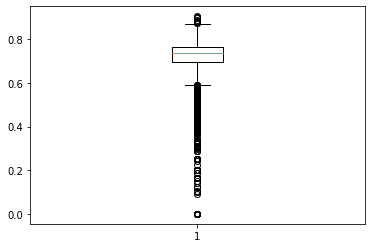

In [475]:
plt.boxplot(fin_test['sim2'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f87ee8c2d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f87eec1b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f87ee8c2a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f87eec1bb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f87eec1beb0>],
 'means': []}

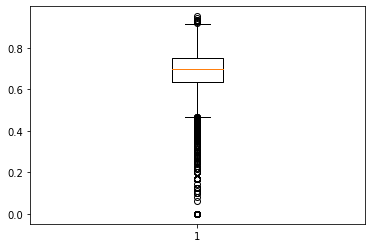

In [476]:
plt.boxplot(fin_test['sim'])

In [467]:
fin_test

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name,token,sim,sim2
0,꼬꼬누리-답심리점,as**님,2020년 12월 7일,5.0,5.0,5.0,양념치킨/1,일단 양념이 정말 맛있었습니다. 또 뼈까지 양념이 베어있어 뼈를 빨아먹는 맛도 있었...,NaN,꼬꼬누리-답심리점_0,"[일단, 양념, 정말, 맛있다, 또, 뼈, 까지, 양념, 베다, 뼈, 빨, 아, 먹...",0.500000,0.730000
1,꼬꼬누리-답심리점,a_**님,2020년 11월 6일,5.0,4.0,4.0,"한방후라이드/1,모듬감자/1",치킨은 담백 고소하고 기름기가 없네요\n감자는 가격대비 양이 적은거 같아요,NaN,꼬꼬누리-답심리점_1,"[치킨, 담, 백, 고소하다, 기름기, 없다, 감자, 가격, 대비, 양, 적다, 같다]",0.250000,0.590000
2,꼬꼬누리-답심리점,ku**님,2020년 8월 21일,5.0,3.0,1.0,"한방후라이드/1,닭발/1,생맥주 1000cc/2",치킨 닭발 다 맛있습니다 깔끔바삭하니 취향저격인디.. 양이 좀 적고 포장을 이상하게...,ku**님 소중한 리뷰 감사드립니다.\n양과 포장에대한 불만사항에 대하여 조치하도록...,꼬꼬누리-답심리점_2,"[치킨, 닭발, 다, 맛있다, 깔다, 끄다, 바삭, 하, 니, 취향, 저격, 인, ...",0.250000,0.620000
3,꼬꼬누리-답심리점,se**님,2020년 8월 15일,5.0,5.0,5.0,한방후라이드/1,맛있게 먹었습니다 배달도 빨라서 좋았어요^^,se**님 소중한 리뷰 감사드립니다.\n맛있는 치킨을 따뜻하게 드셔서 다행입니다^^...,꼬꼬누리-답심리점_3,"[맛있다, 먹다, 배달, 빨, 라서, 좋다]",0.500000,0.790000
4,지코바치킨-장안1호점,jb**님,어제,5.0,5.0,4.0,순살양념（순한맛）/1,역시 믿고 먹는 지코바 👍 맛있어요!,jb**님 안녕하세요\n소중한 리뷰 감사합니다\n맛있게 드셔 주어서 감사합니다\n리...,지코바치킨-장안1호점_0,"[역시, 믿다, 먹다, 지, 코바, 맛있다]",0.666667,0.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5772,봉명동내커피-경희대점,wn**님,2020년 8월 2일,5.0,5.0,5.0,"그린티라떼/1(HOT or ICE 선택(ICE)),초코라떼/1(HOT or ICE ...",주문실수랑 배달이 살짝 늦긴 했지만 맛은 정말 좋았습니다!,NaN,봉명동내커피-경희대점_379,"[주, 문, 실수, 랑, 배달, 살짝, 늦다, 맛, 정말, 좋다]",0.684211,0.620000
5773,봉명동내커피-경희대점,la**님,2020년 8월 1일,5.0,5.0,5.0,"봉.내떡볶이/1(맛 선택(보통맛)),복숭아아이스티/1",사진은 찍지 못했지만 떡볶이 진짜 맛있네요!ㅎㅎ 같이 먹은 와플도 되게 쫄깃하고 생...,NaN,NaN,"[사진, 찍다, 못, 떡볶이, 진짜, 맛있다, 같이, 먹다, 와플, 되게, 쫄깃, ...",0.860000,0.750000
5774,봉명동내커피-경희대점,ly**님,2020년 8월 1일,4.0,5.0,3.0,"아메리칸애플생크림와플/1,카페라떼 ICE/1",와플 맛있어요!! 배달이 좀 걸려서 커피는 밍밍했어요 ㅠㅠ,NaN,NaN,"[와플, 맛있다, 배달, 걸리다, 커피, 밍밍]",0.611111,0.571429
5775,봉명동내커피-경희대점,wq**님,2020년 8월 1일,5.0,5.0,5.0,"페퍼로니피자토스트/1,아메리카노 ICE/1,비엔나커피 ICE/1,사과시리얼와플（사장...",토스트 와플 리얼 찐맛탱집...,NaN,NaN,"[토스트, 와플, 리얼, 찌다, 맛, 탱, 집]",0.625000,0.600000


In [459]:
len(cosine_similarities)

5777

In [429]:
fin_test=None
fin_test==None

True

In [79]:
catagory15.shop.value_counts()

꽃보다족발-본점             2026
큰맘할매순대국-배봉사거리점        936
닥터찬의찌개백반-전농점          555
봉명동내커피-경희대점           384
푸라닭-장안2호점             286
강금옥쭈꾸미                262
두마리찜닭두찜-동대문답십리점       255
아빠두리만든떡볶이-외대점         239
강씨네즉석떡볶이              168
파스타리아-전농점             115
지코바치킨-장안1호점           104
꽃보다족발-동대문점            101
푸라닭-답십리점               85
호랭이양식당                 63
돈갓수제돈까스-장안점            57
면밥                     57
골라먹는짱닭치킨-장안답십리점        41
정성간장&매운갈비찜도시락-장안점      22
청년불막창                   9
강떡                      8
꼬꼬누리-답심리점               4
Name: shop, dtype: int64

In [80]:
cat15_shops=catagory15.shop.value_counts()[catagory15.shop.value_counts()>100].keys()

In [407]:
test=catagory15[catagory15.shop==cat15_shops[2]]

In [82]:
cat15_shops[0]

'꽃보다족발-본점'

In [395]:
test.shape

(936, 11)

In [408]:
test_tokenized_data=test.token.values.tolist()

In [391]:
test_tokenized_data

[['요청', '사항', '자다', '들어주다', '맛있다'],
 ['맛있다', '먹다'],
 ['김치', '찜', '보다', '김치찌개', '같다'],
 ['머', '그냥', '그렇다'],
 ['항상', '맛있다'],
 ['항상', '맛', '품질', '일정하다', '좋다'],
 ['최고', '이다', '먹다', '있다'],
 ['맛있다', '자다', '먹다'],
 ['맛있다', '먹다'],
 ['항상', '시키다', '먹다', '맛있다', '습', '니당다'],
 ['국물',
  '진짜',
  '많다',
  '고기',
  '더',
  '많다',
  '명분',
  '덜다',
  '찍다',
  '사진',
  '만',
  '남다',
  '양',
  '정말',
  '많다',
  '맛',
  '잇다'],
 ['맛있다',
  '자다',
  '먹다',
  '양도',
  '많다',
  '건더기',
  '많다',
  '좋다',
  '순대',
  '맛있다',
  '김치',
  '랑',
  '양파',
  '절임',
  '맛있다',
  '욥'],
 ['양도',
  '많다',
  '깔끔하다',
  '너무',
  '자다',
  '먹다',
  '순',
  '대국',
  '먹다',
  '싶다',
  '항상',
  '여기',
  '부터',
  '생각나다',
  '김치',
  '랑',
  '양파',
  '절임',
  '강추',
  '이다'],
 ['양도', '많다', '맛있다', '그릇', '찌그러지다', '서다', '먹다', '때', '자꾸', '기울어지다'],
 ['맛있다', '먹다', '엇습', '니당다', '요청', '들어주다'],
 ['맛있다', '만유', '배달', '빨르다', '유'],
 ['맛있다'],
 ['항상', '맛있다', '먹다', '있다'],
 ['아침',
  '일찍',
  '배달',
  '되다',
  '넘다',
  '좋다',
  '배달',
  '빠르다',
  '양도',
  '푸다',
  '짐해',
  '요',
  '서비스',
  '주신',
  '순',
  '대도'

In [426]:
def make_doc_embed_list(test_tokenized_data):
    document_embedding_list = []

    for idx,review in enumerate(test_tokenized_data):
        doc2vec = None
        cnt=0
        for word in review:
            if word in model.wv.vocab:
                cnt+=1
                if doc2vec is None:
                    doc2vec= model.wv.__getitem__(word)
                else:
                    doc2vec= doc2vec+ model.wv.__getitem__(word)
        
        if doc2vec is not None:
        
            doc2vec=doc2vec/cnt
         
        else:
            doc2vec=np.zeros(100,)
        
        document_embedding_list.append(doc2vec)
        
    return document_embedding_list

In [410]:
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)

In [411]:
len(document_embedding_list)

555

In [412]:
test.shape

(555, 11)

In [419]:
j=24
sim_score=list(enumerate(cosine_similarities[j]))
sim_score=sorted(sim_score,key=lambda x:x[1],reverse=True)
sim_reivew_idx=[i for i in sim_score[1:50]]

print(f'현재 리뷰 : ',test.review_customer.values[j])

for i in sim_reivew_idx:

    print(f'유사리뷰 {i} : ',test.review_customer.values[i[0]])

현재 리뷰 :  네 .... 뭐 .. 요창사항은 하나도 안들어 주셨네요
유사리뷰 (76, 0.8474283198652792) :  공기밥 하나 추가햇는데 안왔네요
담번에 주문하게되면 그때주세요
밥은 잘먹었습니다
유사리뷰 (475, 0.8337256494282325) :  써비스 깜박하고 안주셨지만 맛나서 별5개 드릴게용 약속하신대로 담에 서비스 2배 기대함다 ㅠㅠ
유사리뷰 (34, 0.8233017879936495) :  양 많고 좋았어요! 9종 반찬도 맛있게 잘 먹었습니다!
... 근데 실수이신지.. 젓가락을 안 주셔서 반찬도 다 숟가락으로 먹었네요 ㅋㅋㅋ 그래도 밥 한 끼 떼우기 좋았습니다👍🏻
담엔 부대찌개 시켜먹어보려구요!
유사리뷰 (541, 0.8216234415229526) :  이 집은 포장지 함부로 뜯으면 안됩니다. 정갈하게 뜯어야해요. 그래야 배고플때 다시먹습니다. 
첫 주문이였는데 "배달음식은 거기서 거기라는 편견을 깨겠다" 라는 자부심을 가지실만큼 맛있고 양많고 배달빠르네요. 리뷰 이벤트로오는 참치마요가 이미 밥 한공기보다 많은 것 같습니다.
공기밥 2개도  보통 백반집 1.5배로 오는 것 같습니다. 반찬은 김치, 깍두기없이 9찬이라서 놀랐습니다. 집반찬으로와서 오랜만에 맛있게 잘먹었어요. 리뷰이벤트 계속해주시면 좋을 것 같아요. 참치마요JMT 프랜차이즈 가게라는게 또 놀라운 점입니다.
유사리뷰 (412, 0.8213362034660527) :  리뷰 참여했는데 ㅠㅠ 안왔네욤
양도 많고 맛도 있어요
배달도 빨리해주셨구요 👍🏻
유사리뷰 (256, 0.8190721275227908) :  햄가득 부대찌개라고 적혀잇어서 들어잇어봣자 얼마나 있겠어 하고 시켰는데 과장없이 국물반 햄반이네요...맛도 좋습니다
유사리뷰 (18, 0.8071073156493375) :  한참 먹는중에 생선가시같은게 나와 찝찝해서 전화드렸더니 참치에서 나온것 같다라고만 하시네요. 참치 통조림 쓰시는 아닌가요..거기에 생선가시가 들어있을수도 있는건가요??? 그리고 찬좀 넉넉히

In [513]:
def make_sim(cosine_similarities,df):
    ans=[]
    for j in range(len(df)):
        simiar_review=np.where(cosine_similarities[j] >0.83)
        cnt=0
        num=1
        for idx in simiar_review[0]:
            cnt+=check_cat13(df.iloc[idx,])
            num+=1
            if num==100:
                break
        cnt=cnt/num
        ans.append(cnt)
    return ans

In [417]:
ans_a=np.array(ans)

In [418]:
np.where(ans_a <0.4)

(array([ 24,  85,  87,  90, 101, 112, 122, 138, 140, 152, 201, 219, 222,
        233, 260, 291, 301, 302, 311, 343, 347, 361, 367, 386, 439, 462,
        474, 480, 482, 483, 509, 522, 530]),)

In [415]:
test['sim']=ans

<ipython-input-415-dddc5168dd7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sim']=ans


In [402]:
test.iloc[501,]

shop                                        큰맘할매순대국-배봉사거리점
name                                                 ki**님
date                                          2020년 2월 20일
star_flavor                                              5
star_volume                                              5
star_deliver                                             5
menu               （조리）순대국/1(메뉴선택(보통（혼합）)),（조리）할매토종순대（소）/1
review_customer                             항상 맛있게 잘먹고있습니다
review_owner                                           NaN
img_name                                               NaN
token                                        [항상, 맛있다, 먹다]
sim                                                  0.725
Name: 1747, dtype: object

In [385]:
test.sim.iloc[2018,]

0.0

In [420]:
fin_test.append(test)

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name,token,sim
2737,꽃보다족발-본점,st**님,지금 등록,5.0,5.0,5.0,족발＋쟁반막국수＋콜라/1(사이즈 선택(小)),소짜리인데도 정말 푸짐해요\n고기도 맛있고 정말 후회 없었습니다\n같이 오는 막국수...,NaN,꽃보다족발-본점_0,"[소, 짜다, 이다, 정말, 푸다, 짐해, 요, 고기, 맛있다, 정말, 후회, 없다...",0.730000
2738,꽃보다족발-본점,ej**님,지금 등록,4.0,4.0,5.0,보쌈＋쟁반막국수＋콜라/1(사이즈 선택(특)),맛있게잘먹었어요.\n또먹을거예용,NaN,NaN,"[맛있다, 먹다, 또, 먹다, 예, 용]",0.690000
2739,꽃보다족발-본점,yg**님,지금 등록,5.0,5.0,5.0,"족발＋쟁반막국수＋콜라/1(사이즈 선택(大),사이드 추가(막국수 소,콜라 1.25L))",오~~맛 좋아요.\n이젠 고정 주문처가 생겼어요.\n이사와서 방황했거든요ㅎ,NaN,꽃보다족발-본점_2,"[오, 맛, 좋다, 젠, 고정, 주문, 처가, 생기다, 이사, 서다, 방황]",0.687500
2740,꽃보다족발-본점,si**님,6시간 전,5.0,5.0,5.0,족발＋쟁반막국수＋콜라/1(사이즈 선택(小)),푸짐한 막국수랑 족발 잘 먹었어용 또시킬게요~~,NaN,꽃보다족발-본점_3,"[푸다, 짐, 막국수, 랑, 족발, 자다, 먹다, 또, 시키다]",0.715000
2741,꽃보다족발-본점,bl**님,16시간 전,5.0,5.0,5.0,"보쌈＋쟁반막국수＋콜라/1(사이즈 선택(특),사이드 추가(공기밥))",완벽합니다. 국수도 보쌈도 김치도 맛있네요,NaN,NaN,"[완벽하다, 국수, 보쌈, 김치, 맛있다]",0.553030
...,...,...,...,...,...,...,...,...,...,...,...,...
2732,닥터찬의찌개백반-전농점,ho**님,2018년 12월 13일,5.0,5.0,5.0,"참치김치찌개/1(사이즈 선택(大（3~4人）),추가 선택(스팸추가))",집에서 맛있게 만든 맛!!!,ho**님!! 사진까지 포함한 리뷰 남겨주셔서 감사합니다. 항상 집에서 만든 맛을 ...,닥터찬의찌개백반-전농점_550,"[집, 에서, 맛있다, 만들다, 맛]",0.500000
2733,닥터찬의찌개백반-전농점,dl**님,2018년 12월 11일,5.0,5.0,4.0,"참치김치찌개/1(사이즈 선택(中（2~3人）)),스팸구이1人（4조각）/1",배달 조금 오버됐지만\n잘먹을게요~ 콜라 굳~ 반찬 굳~,dl**님. 사진 리뷰 감사드립니다.(__) 추운날 배달대행하시는 분들이 일요일에 ...,닥터찬의찌개백반-전농점_551,"[배달, 조금, 오버, 돼다, 먹다, 콜라, 굳다, 반찬, 굳다]",0.600000
2734,닥터찬의찌개백반-전농점,손님,2018년 12월 9일,3.0,4.0,4.0,햄많이 얼큰부대찌개/1(사이즈 선택(中（2~3人）)),부대찌개가 넘달아요ㅠ뭔가 먹고나서 개운한 느낌은 없는거같구요. 양은많고 전자렌지전용...,ks**님! 사진 리뷰 감사드립니다. 모든이의 입맛에 맞는 찌개를 제공하려다보니 단...,닥터찬의찌개백반-전농점_552,"[부대찌개, 넘다, 달다, 뭔가, 먹다, 개운하다, 느낌, 없다, 같다, 양은, 많...",0.640000
2735,닥터찬의찌개백반-전농점,손님,2018년 12월 8일,5.0,4.0,4.0,"치즈 얼큰부대찌개/1(사이즈 선택(中（2~3人）),추가 선택(안익힌 라면사리 추가))",진짜 맛나게 잘먹었어요,xi**님!! 리뷰 남겨주셔서 감사드립니다.^^ 양과 배달에서 별이 4개인 부분은 ...,NaN,"[진짜, 맛, 나다, 먹다]",0.797872


In [421]:
test

,shop,name,date,star_flavor,star_volume,star_deliver,menu,review_customer,review_owner,img_name,token,sim
2182,닥터찬의찌개백반-전농점,lo**님,어제,5.0,5.0,3.0,햄많이 얼큰부대찌개/1(사이즈 선택(中（2~3人）)),항상 맛있게 잘먹는데 항상 국물이 흘려서 오네요ㅜ,소중한 리뷰 감사합니다. 배달과 포장에 조금 더 신경써서 보내드릴 수 있도록 하겠습...,닥터찬의찌개백반-전농점_0,"[항상, 맛있다, 먹다, 항상, 국물, 흘리다, 오다]",0.774194
2183,닥터찬의찌개백반-전농점,lo**님,어제,5.0,5.0,5.0,"돼지김치찌개/1(사이즈 선택(中（2~3人）),추가 선택(고기추가))",맛있었습니다 담에또시킬게요,소중한 리뷰 감사합니다! 항상 만족스럽게 드실 수 있도록 더욱 노력하겠습니다.,NaN,"[맛있다, 담, 또, 시키다]",0.680556
2184,닥터찬의찌개백반-전농점,rl**님,6일 전,5.0,5.0,5.0,돼지김치찌개/1(사이즈 선택(中（2~3人）)),맛있게 잘먹었습니다 ㅎㅎ,감사합니다! 항상 모든 분들이 만족하시며 드실 수 있도록 노력하는 닥터찬이 되겠습니다.,닥터찬의찌개백반-전농점_2,"[맛있다, 먹다]",0.777174
2185,닥터찬의찌개백반-전농점,gs**님,일주일 전,5.0,5.0,5.0,돼지김치찌개/1(사이즈 선택(中（2~3人）)),양도 푸짐하고 맛있어요,소중한 리뷰 감사합니다! 항상 별 가득해지는 리뷰 남겨지도록 더욱 노력하겠습니다.,닥터찬의찌개백반-전농점_3,"[양도, 푸다, 짐, 하고, 맛있다]",0.720588
2186,닥터찬의찌개백반-전농점,lo**님,2020년 12월 16일,5.0,5.0,1.0,햄많이 얼큰부대찌개/1(사이즈 선택(大（3~4人）)),여기 진짜 맛있어요.\n\n근데 지금까지 5번정도 시켜먹었는데 평균 1시간40분 정...,소중한 리뷰 감사합니다. 배달의 경우 평균 1시간 40분까지는 아닌데... 무언가 ...,닥터찬의찌개백반-전농점_4,"[여기, 진짜, 맛있다, 근데, 지금, 까지, 5, 번, 정도, 시키다, 먹다, 평...",0.684783
...,...,...,...,...,...,...,...,...,...,...,...,...
2732,닥터찬의찌개백반-전농점,ho**님,2018년 12월 13일,5.0,5.0,5.0,"참치김치찌개/1(사이즈 선택(大（3~4人）),추가 선택(스팸추가))",집에서 맛있게 만든 맛!!!,ho**님!! 사진까지 포함한 리뷰 남겨주셔서 감사합니다. 항상 집에서 만든 맛을 ...,닥터찬의찌개백반-전농점_550,"[집, 에서, 맛있다, 만들다, 맛]",0.500000
2733,닥터찬의찌개백반-전농점,dl**님,2018년 12월 11일,5.0,5.0,4.0,"참치김치찌개/1(사이즈 선택(中（2~3人）)),스팸구이1人（4조각）/1",배달 조금 오버됐지만\n잘먹을게요~ 콜라 굳~ 반찬 굳~,dl**님. 사진 리뷰 감사드립니다.(__) 추운날 배달대행하시는 분들이 일요일에 ...,닥터찬의찌개백반-전농점_551,"[배달, 조금, 오버, 돼다, 먹다, 콜라, 굳다, 반찬, 굳다]",0.600000
2734,닥터찬의찌개백반-전농점,손님,2018년 12월 9일,3.0,4.0,4.0,햄많이 얼큰부대찌개/1(사이즈 선택(中（2~3人）)),부대찌개가 넘달아요ㅠ뭔가 먹고나서 개운한 느낌은 없는거같구요. 양은많고 전자렌지전용...,ks**님! 사진 리뷰 감사드립니다. 모든이의 입맛에 맞는 찌개를 제공하려다보니 단...,닥터찬의찌개백반-전농점_552,"[부대찌개, 넘다, 달다, 뭔가, 먹다, 개운하다, 느낌, 없다, 같다, 양은, 많...",0.640000
2735,닥터찬의찌개백반-전농점,손님,2018년 12월 8일,5.0,4.0,4.0,"치즈 얼큰부대찌개/1(사이즈 선택(中（2~3人）),추가 선택(안익힌 라면사리 추가))",진짜 맛나게 잘먹었어요,xi**님!! 리뷰 남겨주셔서 감사드립니다.^^ 양과 배달에서 별이 4개인 부분은 ...,NaN,"[진짜, 맛, 나다, 먹다]",0.797872


In [181]:
cnt=0
a=[]
for i in range(len(cosine_similarities)):
    threshold_num=sum(cosine_similarities[i] > 0.85)
    a.append(threshold_num)
    

0.6313559322033898


In [253]:
k=89
test.iloc[k,]

shop                               꽃보다족발-본점
name                                  ev**님
date                          2020년 11월 14일
star_flavor                               5
star_volume                               5
star_deliver                              5
menu               보쌈＋쟁반막국수＋콜라/1(사이즈 선택(小))
review_customer                  1234567890
review_owner                            NaN
img_name                                NaN
token                          [1234567890]
Name: 2826, dtype: object

In [258]:
def check_cat15(x):
    ans=0
    if x.star_flavor==5 and x.star_volume==5 and x.star_deliver==5:
        ans+=0.5
    
    if x.img_name == x.img_name:
        ans+=0.5
    
    return ans

In [505]:
def check_cat14(x):
    ans=0
    
    if x.star_flavor==5:
        ans+=0.33
    
    if x.star_volume==5:
        ans+=0.33
    
    if x.star_deliver==5:
        ans+=0.33
    
    return ans

In [512]:
def check_cat13(x):
    ans=0
    
    if x.img_name == x.img_name:
        ans+=1
    
    return ans
    

In [255]:
check_cat15(test.iloc[k,])

1


0.5